[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1_Y1tDASJgpIEAjOK3q0OjXMbU8cNOJKy?usp=sharing)

# Natural Language Processing on Amazon books review dataset

---

### Dhruv Shah, Jenn Hong, Santiago Mazzei, Setu Shah, Victor Floriano

>[Natural Language Processing on Amazon books review dataset](#scrollTo=qUzIn6_QCBg1)

>>>[Dhruv Shah, Jenn Hong, Santiago Mazzei, Setu Shah, Victor Floriano](#scrollTo=qUzIn6_QCBg1)

>>[Data Preprocessing and EDA](#scrollTo=Jo1hXtAmrxoX)

>>>[Column Transformations](#scrollTo=c10MoZ3NU5dJ)

>>>[Dealing With Missing Values](#scrollTo=bSNnEHIbsG9c)

>>[Preliminary Analysis](#scrollTo=_SvtVaUIsxoM)

>>>[Dimension Reduction](#scrollTo=Gu-NYElCtQ7N)

>>>[KMeans Clustering](#scrollTo=BVTPnogmuYX6)

>>>[Hierarchical Clustering](#scrollTo=_ZDq7qk1uHIA)

>>>[Investigating Cluster Characteristics](#scrollTo=94zwzqQ1x8BL)

>>>>[Hierarchical Clustering](#scrollTo=QbM-syIYo8y8)

>>>>[KMeans Clustering](#scrollTo=zGfK6dvWpEHv)

>>[Next Steps](#scrollTo=uAfvbKl8sI5Y)

>>[Text Mining](#scrollTo=jKUXEp-tkNrS)

>>>[Regex](#scrollTo=vlmAftrD2vbp)

>>>[Lemmatizing, Stemming and Tokenizing](#scrollTo=Ofy9joAB20Ma)

>>>[Bag of Words](#scrollTo=7YMOMq_l2-Rq)



In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Download the data from Google Drive
!gdown 1GGcWJn9u4efQGt-HMx7UknvvXuhwHAAe

Downloading...
From: https://drive.google.com/uc?id=1GGcWJn9u4efQGt-HMx7UknvvXuhwHAAe
To: /content/random_sample_100.json
100% 55.9M/55.9M [00:00<00:00, 118MB/s]


For this phase of the project, we use a random sample of our dataset (~61,000 rows) as the original file was 20 GB and 27 million rows for each review. We also had a metadata file of 4 GB and ~3 million rows for each unique Amazon product from which we extracted only the important features such as `Price` and `Title`.

In [ ]:
# Read JSON file into a dataframe
df = pd.read_json('/content/random_sample_100.json')
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image,vote
0,5,False,"01 23, 2017",A1YTZAZZ1L32RL,0002005263,{'Format:': ' Kindle Edition'},Chuck,Ok reading,Ok,1485129600,NaN,NaN
1,5,True,"08 3, 2014",A3EHZMD24B5BQ0,0002005263,{'Format:': ' Paperback'},Sola49,Good,Five Stars,1407024000,NaN,NaN
2,5,True,"07 9, 2013",A38ZMH9LRCZL3X,0001381733,{'Format:': ' Hardcover'},A. E. Stoff,I purchased it for my new great-granddaughter....,New Book for New Grandchild,1373328000,NaN,NaN
3,5,True,"12 3, 2017",AYMEYAL8G7LJB,0001384198,{'Format:': ' Hardcover'},MARILYN,A very nice replica of the original classic.,Excellent reproduction of the timeless classic.,1512259200,NaN,NaN
4,3,False,"10 4, 2011",A39QEKNEFSJ34Q,0002005263,{'Format:': ' Unknown Binding'},hrladyship,If you're thinking of buying The Sinister Pig ...,And the hero is . . .,1317686400,NaN,NaN


In [ ]:
# Download the metadata from Google Drive
!gdown 1JYb0PpOBmQKokFBl8YB7WTQFKYpKu9e8

Downloading...
From (original): https://drive.google.com/uc?id=1JYb0PpOBmQKokFBl8YB7WTQFKYpKu9e8
From (redirected): https://drive.google.com/uc?id=1JYb0PpOBmQKokFBl8YB7WTQFKYpKu9e8&confirm=t&uuid=2235e0a4-915a-4431-a20a-895ec0a75ab1
To: /content/books_meta_short.csv
100% 253M/253M [00:04<00:00, 53.3MB/s]


We merge our reviews dataset with the metadata using the `ASIN` column, which refers to the unique identification code used by Amazon for its product listings.

In [ ]:
# Read CSV with metadata
meta_data = pd.read_csv('/content/books_meta_short.csv')

In [ ]:
# Perform a left join to add metadata information (title, price)
# to each book for each book review
merged_df = pd.merge(df, meta_data, on='asin', how='left')

In [ ]:
#Remove original dataframes
import gc #garbage collector for deleted dataframes

del df
del meta_data

gc.collect

<function gc.collect(generation=2)>

In [ ]:
# Taking a sample of the merged_df because it crashes otherwise

merged_df = merged_df.sample(frac=0.35, random_state=1)

In [ ]:
# Check data types and columns
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21385 entries, 3009 to 54996
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         21385 non-null  int64 
 1   verified        21385 non-null  bool  
 2   reviewTime      21385 non-null  object
 3   reviewerID      21385 non-null  object
 4   asin            21385 non-null  object
 5   style           20371 non-null  object
 6   reviewerName    21384 non-null  object
 7   reviewText      21385 non-null  object
 8   summary         21381 non-null  object
 9   unixReviewTime  21385 non-null  int64 
 10  image           47 non-null     object
 11  vote            4039 non-null   object
 12  Unnamed: 0      21385 non-null  int64 
 13  title           21385 non-null  object
 14  price           18313 non-null  object
dtypes: bool(1), int64(3), object(11)
memory usage: 2.5+ MB


## Data Preprocessing and EDA

---

Upon conducting a preliminary examination of the resulting dataframe, several issues were identified. Originating from JSON files, the `style` column retained its dictionary format, and we encountered multiple instances of null values, formatting inconsistencies, and incorrect data types.

To fix these issues, we corrected formatting and data type discrepancies and adopted a tailored approach for handling missing values.

### Column Transformations

---

In [ ]:
# Convert style from dictionary into standard dataframe column
merged_df['style'] = merged_df['style'].apply(lambda x: x['Format:'].strip()\
                                if pd.notnull(x) and 'Format:' in x else x)

merged_df['style'].head()

3009                 Paperback
31323           Kindle Edition
30662                      NaN
39284           Kindle Edition
17217    Mass Market Paperback
Name: style, dtype: object

We also dropped some redundant columns.

In [ ]:
# Drop image column since it is beyond of the scope of this project
merged_df.drop(columns='image', inplace=True)

In [ ]:
# Dropping 'unnamed 0' column as it is just the index of the meta data column
merged_df.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
# Check all unique values for each column, this will help us check the nature of
# each variable and if there are more missing values listed as '?' or 'missing'

#Print unique values for each variable
print("Unique values in 'overall':", merged_df['overall'].unique(), "\n")
print("Unique values in 'verified':", merged_df['verified'].unique(), "\n")
print("Unique values in 'reviewTime':", merged_df['reviewTime'].unique(), "\n")
print("Unique values in 'reviewerID':", merged_df['reviewerID'].unique(), "\n")
print("Unique values in 'asin':", merged_df['asin'].unique(), "\n")
print("Unique values in 'style':", merged_df['style'].unique(), "\n")
print("Unique values in 'reviewerName':", merged_df['reviewerName'].unique(), "\n")
print("Unique values in 'reviewText':", merged_df['reviewText'].unique(), "\n")
print("Unique values in 'summary':", merged_df['summary'].unique(), "\n")
print("Unique values in 'unixReviewTime':", merged_df['unixReviewTime'].unique(), "\n")
print("Unique values in 'vote':", merged_df['vote'].unique(), "\n")

Unique values in 'overall': [5 3 4 2 1] 

Unique values in 'verified': [ True False] 

Unique values in 'reviewTime': ['08 7, 2017' '06 8, 2015' '02 3, 2016' ... '11 9, 2009' '02 12, 1999'
 '09 21, 2009'] 

Unique values in 'reviewerID': ['AV24Y4VN0PEJH' 'A13CGSP0OJ2WJC' 'A30RQOLY8P3V86' ... 'A2NV8Z90MQARTR'
 'A37I0SFN56638P' 'A3FHSO1SKHU378'] 

Unique values in 'asin': ['0002171856' '0007480849' '0007449313' ... '0007481136' '0029254353'
 '0006531555'] 

Unique values in 'style': ['Paperback' 'Kindle Edition' nan 'Mass Market Paperback' 'Hardcover'
 'DVD' 'Board book' 'Loose Leaf' 'Spiral-bound' 'Audio CD'
 'Hardcover-spiral' 'Imitation Leather' 'Leather Bound'
 'Audible Audiobook' 'Library Binding' 'Kindle Edition with Audio/Video'
 'Audio Cassette' 'School & Library Binding' 'Amazon Video' 'MP3 CD'
 'Ring-bound' 'Unknown Binding' 'Vinyl Bound' 'MP3 Music' 'Vinyl'
 'Plastic Comb' 'DVD-ROM' 'Calendar' 'Map' 'DVD Audio' 'Rag Book' 'Poster'] 

Unique values in 'reviewerName': ['Bill Com

In [ ]:
# Drop reviewerName, reviewerID, and unixReviewTime (we already have a review time variable)
merged_df.drop(columns=['reviewerName','reviewerID', 'unixReviewTime'], inplace=True)

In [ ]:
# Convert reviewTime to datetime (previously an object type)
merged_df['reviewTime'] = pd.to_datetime(merged_df['reviewTime'], format='%m %d, %Y')

In [ ]:
# Check distribution of scores
print('Distribution of Book overall ratings:')
merged_df['overall'].value_counts(normalize=True)

Distribution of Book overall ratings:


5    0.627823
4    0.204022
3    0.089829
2    0.042132
1    0.036194
Name: overall, dtype: float64

In [ ]:
# Check distribution of book formats
print('Distribution of Book formats')
merged_df['style'].value_counts(normalize=True)

Distribution of Book formats


Kindle Edition                     0.483727
Paperback                          0.230867
Hardcover                          0.186098
Mass Market Paperback              0.064994
Audio CD                           0.010407
Board book                         0.009474
Audible Audiobook                  0.002504
Audio Cassette                     0.001865
Kindle Edition with Audio/Video    0.001620
Library Binding                    0.001522
Imitation Leather                  0.000933
Spiral-bound                       0.000835
Leather Bound                      0.000835
Unknown Binding                    0.000638
MP3 CD                             0.000540
School & Library Binding           0.000491
Amazon Video                       0.000491
DVD                                0.000393
Ring-bound                         0.000344
Hardcover-spiral                   0.000245
MP3 Music                          0.000196
Map                                0.000196
Vinyl                           

### Dealing With Missing Values

---

In [ ]:
# Looking at NULL values
merged_df.isna().sum() / len(merged_df) * 100

overall        0.000000
verified       0.000000
reviewTime     0.000000
asin           0.000000
style          4.741641
reviewText     0.000000
summary        0.018705
vote          81.112930
title          0.000000
price         14.365209
dtype: float64

In [ ]:
# Filling in the NULL values, 0 for vote (no one voted that review to be helpful), style as unknown, and price as median as per descriptive statistics

merged_df['vote'] = merged_df['vote'].fillna(0)
merged_df['style'] = merged_df['style'].fillna("unknown")
merged_df['price'] = merged_df['price'].fillna(13.39)

In [ ]:
# Cleaning up the price column which has this one formatting issue and changing the dtype to integer

merged_df['price'] = merged_df['price'].replace(".a-section.a-spacing-mini{margin-bottom:6px!important;margin-top:10px}#actionPanel #availability{font-size:17px!important;font-weight:400!important}#actionPanel #availability p#pa_other_website_text{color:#888!important;margin-top:6px}#actionPanel #merchant-info{font-size:13px;color:#333}#actionPanel #pa_avaliability_message{font-size:12px!important;font-weight:400!important}#actionPanel #pa_avaliability_message a{white-space:normal!important}#actionPanel #pa_avaliability_message span{color:#888!important}#actionPanel #availability-brief #availability+br{display:none}// This is an empty file #actionPanel #bbop-sbbop-container{margin-bottom:0}#actionPanel .buybox-main{padding:0 40px}#actionPanel #priceblock_ourprice_row span.feature img{padding-top:8px!important}#actionPanel #onetimeOption .a-radio-label #priceBadging_feature_div a:not(.a-popover-trigger),#actionPanel #usedOption .a-radio-label #priceBadging_feature_div a:not(.a-popover-trigger){display:none}#actionPanel #pa_feedbackForm_rootmain{text-align:center}.burj #buybox_feature_div #deal #regularBuybox{margin-bottom:14px!important}.burj #hero-quick-promo hr{display:none}#actionPanel #hqp{margin-top:26px}#actionPanel #hqp #amsDetailRight{margin-bottom:18px}#actionPanel #hqp #amsDetailRightWide{margin-bottom:18px}#actionPanel #hqp #hqp-left{margin-bottom:18px}div#hqp-bottom.a-section.burj{margin-bottom:0}.burj #instantOrderUpdate_feature_div", np.NaN)
merged_df['price'] = merged_df['price'].str.replace('$', '').astype(float)

<ipython-input-212-9245d48b8fa3>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merged_df['price'] = merged_df['price'].str.replace('$', '').astype(float)


In [ ]:
# Checking descriptive statistics for Price
merged_df['price'].describe()

count    17545.000000
mean        23.652554
std         55.474282
min          0.010000
25%          8.000000
50%         13.420000
75%         22.810000
max        972.490000
Name: price, dtype: float64

In [ ]:
# Dropping null values for review and summary since they have such low %
merged_df.dropna(inplace=True)

In [ ]:
# Checking the values of vote to find the mismatched one
merged_df['vote'].unique()

array([0, '2', '4', '3', '19', '7', '5', '15', '12', '13', '36', '11',
       '18', '6', '14', '8', '96', '41', '26', '21', '9', '77', '33',
       '17', '42', '89', '24', '22', '20', '16', '299', '64', '35', '45',
       '128', '25', '28', '69', '40', '38', '30', '23', '10', '48', '60',
       '429', '212', '29', '31', '27', '135', '43', '32', '73', '68',
       '123', '51', '50', '34', '88', '49', '39', '92', '52', '213', '37',
       '181', '119', '199', '82', '44', '229', '84', '95', '80', '46',
       '104', '71', '47', '87', '58', '254', '55', '108', '190', '70',
       '143', '201', '54', '66', '102', '796', '75', '67', '105', '312',
       '61', '101', '148', '133', '154', '290', '132', '606', '56', '116',
       '548', '81', '93', '62', '231', '94', '112'], dtype=object)

In [ ]:
# Changing the dtype of verified to 0 and 1, changing the dtype of vote to int
merged_df['verified'] = merged_df['verified'].astype(int)
merged_df['vote'] = merged_df['vote'].replace('6,547', '6547').astype(int)

In [ ]:
# Creating and adding a new column that has the number of reviews for each book

count_df = pd.DataFrame(merged_df['asin'].value_counts())
count_df = count_df.reset_index()
count_df.columns = ['asin', 'total_review_count']

merged_df = pd.merge(merged_df, count_df, on='asin', how='left')

In [ ]:
# Adding columns for year, month, date so we can use the reviewtime column for clustering

merged_df['year'] = merged_df['reviewTime'].dt.year
merged_df['day_of_week'] = merged_df['reviewTime'].dt.dayofweek
merged_df['month'] = merged_df['reviewTime'].dt.month
merged_df

,overall,verified,reviewTime,asin,style,reviewText,summary,vote,title,price,total_review_count,year,day_of_week,month
0,5,1,2017-08-07,0002171856,Paperback,This is the best Survival guide out there and ...,Best Survival Guide Ever!,0,The Sas Survival Handbook,9.45,40,2017,0,8
1,5,1,2015-06-08,0007480849,Kindle Edition,This was a fantastic book. Showing the normal...,This was a fantastic book. Showing the normal ...,0,FORGOTTEN SEAMSTRESS- PB,13.37,14,2015,0,6
2,5,1,2016-02-03,0007449313,unknown,I have loved this book from the first time I r...,I have loved this book from the first time I r...,0,Pride &amp; Prejudice (Collins Classics),24.99,80,2016,2,2
3,5,0,2013-09-11,0007176236,Mass Market Paperback,I love this fun book. Janet Evanovich's books...,Huge fan!,0,METRO GIRL (Alex Barnaby),24.98,17,2013,2,9
4,4,1,2017-04-07,0002255863,Paperback,"Reading through, it almost feels like what one...",it almost feels like what one would imagine th...,2,The God of Small Things,5.49,20,2017,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17536,4,1,2017-02-09,0007177437,Kindle Edition,Excellent read. I couldn't put it down.,Four Stars,0,PEOPLE OF THE BOOK,15.99,26,2017,3,2
17537,5,1,2014-08-29,0007531966,Kindle Edition,Growing older and wiser with J P? Love all J @...,Love all J @ Jances books,0,Second Watch,13.44,34,2014,4,8
17538,4,0,2002-09-21,0060082194,Mass Market Paperback,"Jackie Burke is caught with $50,000.00 and som...",RUM PUNCH HAS SOME PUNCH!!!,0,Rum Punch,25.13,3,2002,5,9
17539,5,0,2001-08-10,000711835X,Imitation Leather,I was stunned. I have never read a book where...,"Amazing, shocking, a truly brilliant work of art!",4,The Hobbit,77.95,632,2001,4,8


To conclude our preprocessing stage, we carefully selected the variables most relevant for our subsequent clustering analysis:

* `overall`: the review score (1 to 5)

* `verified`: whether the review was verified or not (binary)

* `vote`: how many upvotes did each review received

* `price`: the price of the book being reviewed

* `total_review_count`: the total number of reviews for the book being reviewed

* `year`: year of the review

* `day_of_week`: day of the week for the review

* `month`: month of the review


In [ ]:
# Pulling out relevant variables for clustering

clustering_df = merged_df[['overall', 'verified', 'vote', 'price', 'total_review_count', 'year', 'day_of_week', 'month']]

In [ ]:
clustering_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17541 entries, 0 to 17540
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   overall             17541 non-null  int64  
 1   verified            17541 non-null  int64  
 2   vote                17541 non-null  int64  
 3   price               17541 non-null  float64
 4   total_review_count  17541 non-null  int64  
 5   year                17541 non-null  int64  
 6   day_of_week         17541 non-null  int64  
 7   month               17541 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 1.2 MB


## Preliminary Analysis

---

After completing the initial preprocessing, we standardized the data to prepare it for the next steps.

Post-standardization, we applied dimension reduction (PCA) to the dataset and assessed the cumulative explained variance by each principal component. Our analysis revealed that retaining ~94% of explained variance required 6 out of 7 components.

Given the minimal number of features in our dataset, we deemed the loss in interpretability from PCA unnecessary. Consequently, we decided to continue with our analysis using only the standardized data, bypassing PCA to preserve interpretability for our clustering methods.

### Dimension Reduction

---


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
normalized_data = sc.fit_transform(clustering_df)

df_normalized = pd.DataFrame(normalized_data, columns=clustering_df.columns)

df_normalized

,overall,verified,vote,price,total_review_count,year,day_of_week,month
0,0.641889,0.659518,-0.140214,-0.256064,-0.354224,0.985245,-1.472288,0.485674
1,0.641889,0.659518,-0.140214,-0.185406,-0.488842,0.490790,-1.472288,-0.090104
2,0.641889,0.659518,-0.140214,0.024044,-0.147118,0.738018,-0.469165,-1.241658
3,0.641889,-1.516259,-0.140214,0.023864,-0.473309,-0.003665,-0.469165,0.773562
4,-0.309795,0.659518,0.013135,-0.327443,-0.457776,0.985245,0.533958,-0.665881
...,...,...,...,...,...,...,...,...
17536,-0.309795,0.659518,-0.140214,-0.138181,-0.426711,0.985245,0.032397,-1.241658
17537,0.641889,0.659518,-0.140214,-0.184145,-0.385289,0.243563,0.533958,0.485674
17538,-0.309795,-1.516259,-0.140214,0.026567,-0.545796,-2.723167,1.035519,0.773562
17539,0.641889,-1.516259,0.166485,0.978648,2.710941,-2.970394,0.533958,0.485674


In [ ]:
# Principal Component Analysis
from sklearn.decomposition import PCA
import plotly.express as px
import matplotlib.pyplot as plt

# Fit PCA model on dataset
model = PCA()
model.fit(df_normalized)
transformed_data = model.transform(df_normalized)

pca_data = pd.DataFrame(transformed_data)

column_names = []
for k in range(1, 9):
  column_names.append("PCA " + str(k))

pca_data.columns = column_names

# Plot variance per Principal Component
cumulative_var = np.cumsum(model.explained_variance_ratio_*100)
px.line(cumulative_var, title='Variance Captured by Each Principal Component', labels={'value': 'Cumulative Variance', 'index':'Principal Component'})

### KMeans Clustering

---

First, we tried KMeans clustering and used elbow plot to determine optimal number of clusters. We also used silhouette plots to assess the shape of our clusters and if they were distinct from each other.

In [ ]:
# KMeans Clustering
from sklearn.cluster import KMeans

num_clusters = 5
kmeans_df = clustering_df
kmeans_result = KMeans(num_clusters,init='random', n_init = 'auto', random_state = 0).fit(df_normalized)
kmeans_df['cluster_labels'] = kmeans_result.labels_

<ipython-input-31-b3224fbfbcf8>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



We did not find an obvious optimal k from the eblow plot below, but we settled on k = 5 due to the slight kink we observe. We also based this decision on the balancing between the need to minimize number of clusters while also reducing overall distortion. According to our preliminary analysis, k = 5 helps us achieve these divergent goals.

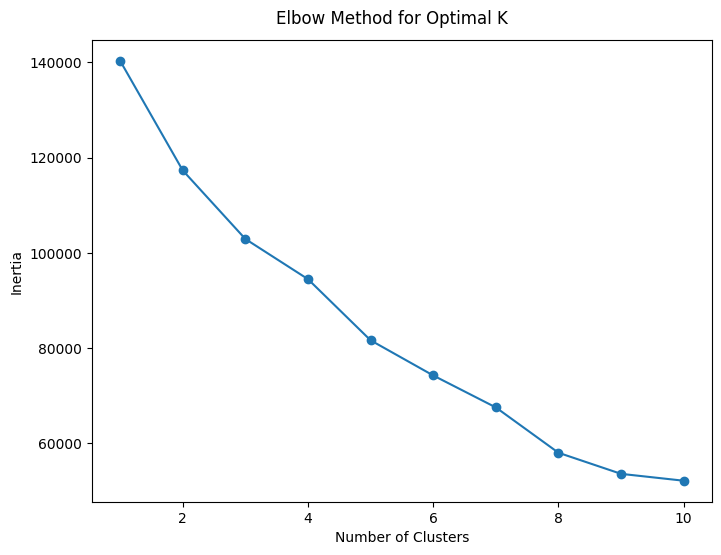

In [ ]:
# Plotting elbow plot to visualize optimal clusters
distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state = 2)
    kmeans.fit(df_normalized)
    distortions.append(kmeans.inertia_)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.suptitle('Elbow Method for Optimal K', y = 0.93)
plt.grid(False)
plt.show();

The silhouette plot supports our decision to use k=5 as the optimal number of clusters. The silhouettes are of similar size with a averege silhouette score threshold of approximately 0.22.

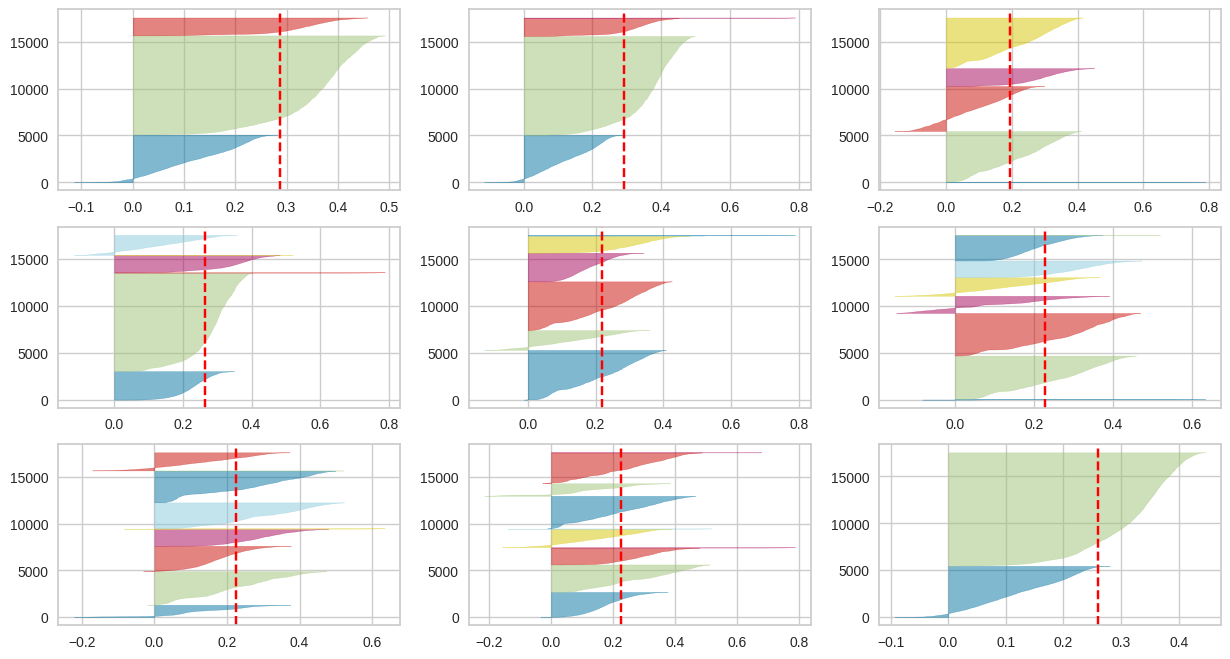

In [ ]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 3, figsize=(15,8))

for i in [2, 3, 4, 5, 6, 7, 8, 9, 10]:

    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 3)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_normalized)

We do not observe any clear visual patterns between clusters from the pairplots below.

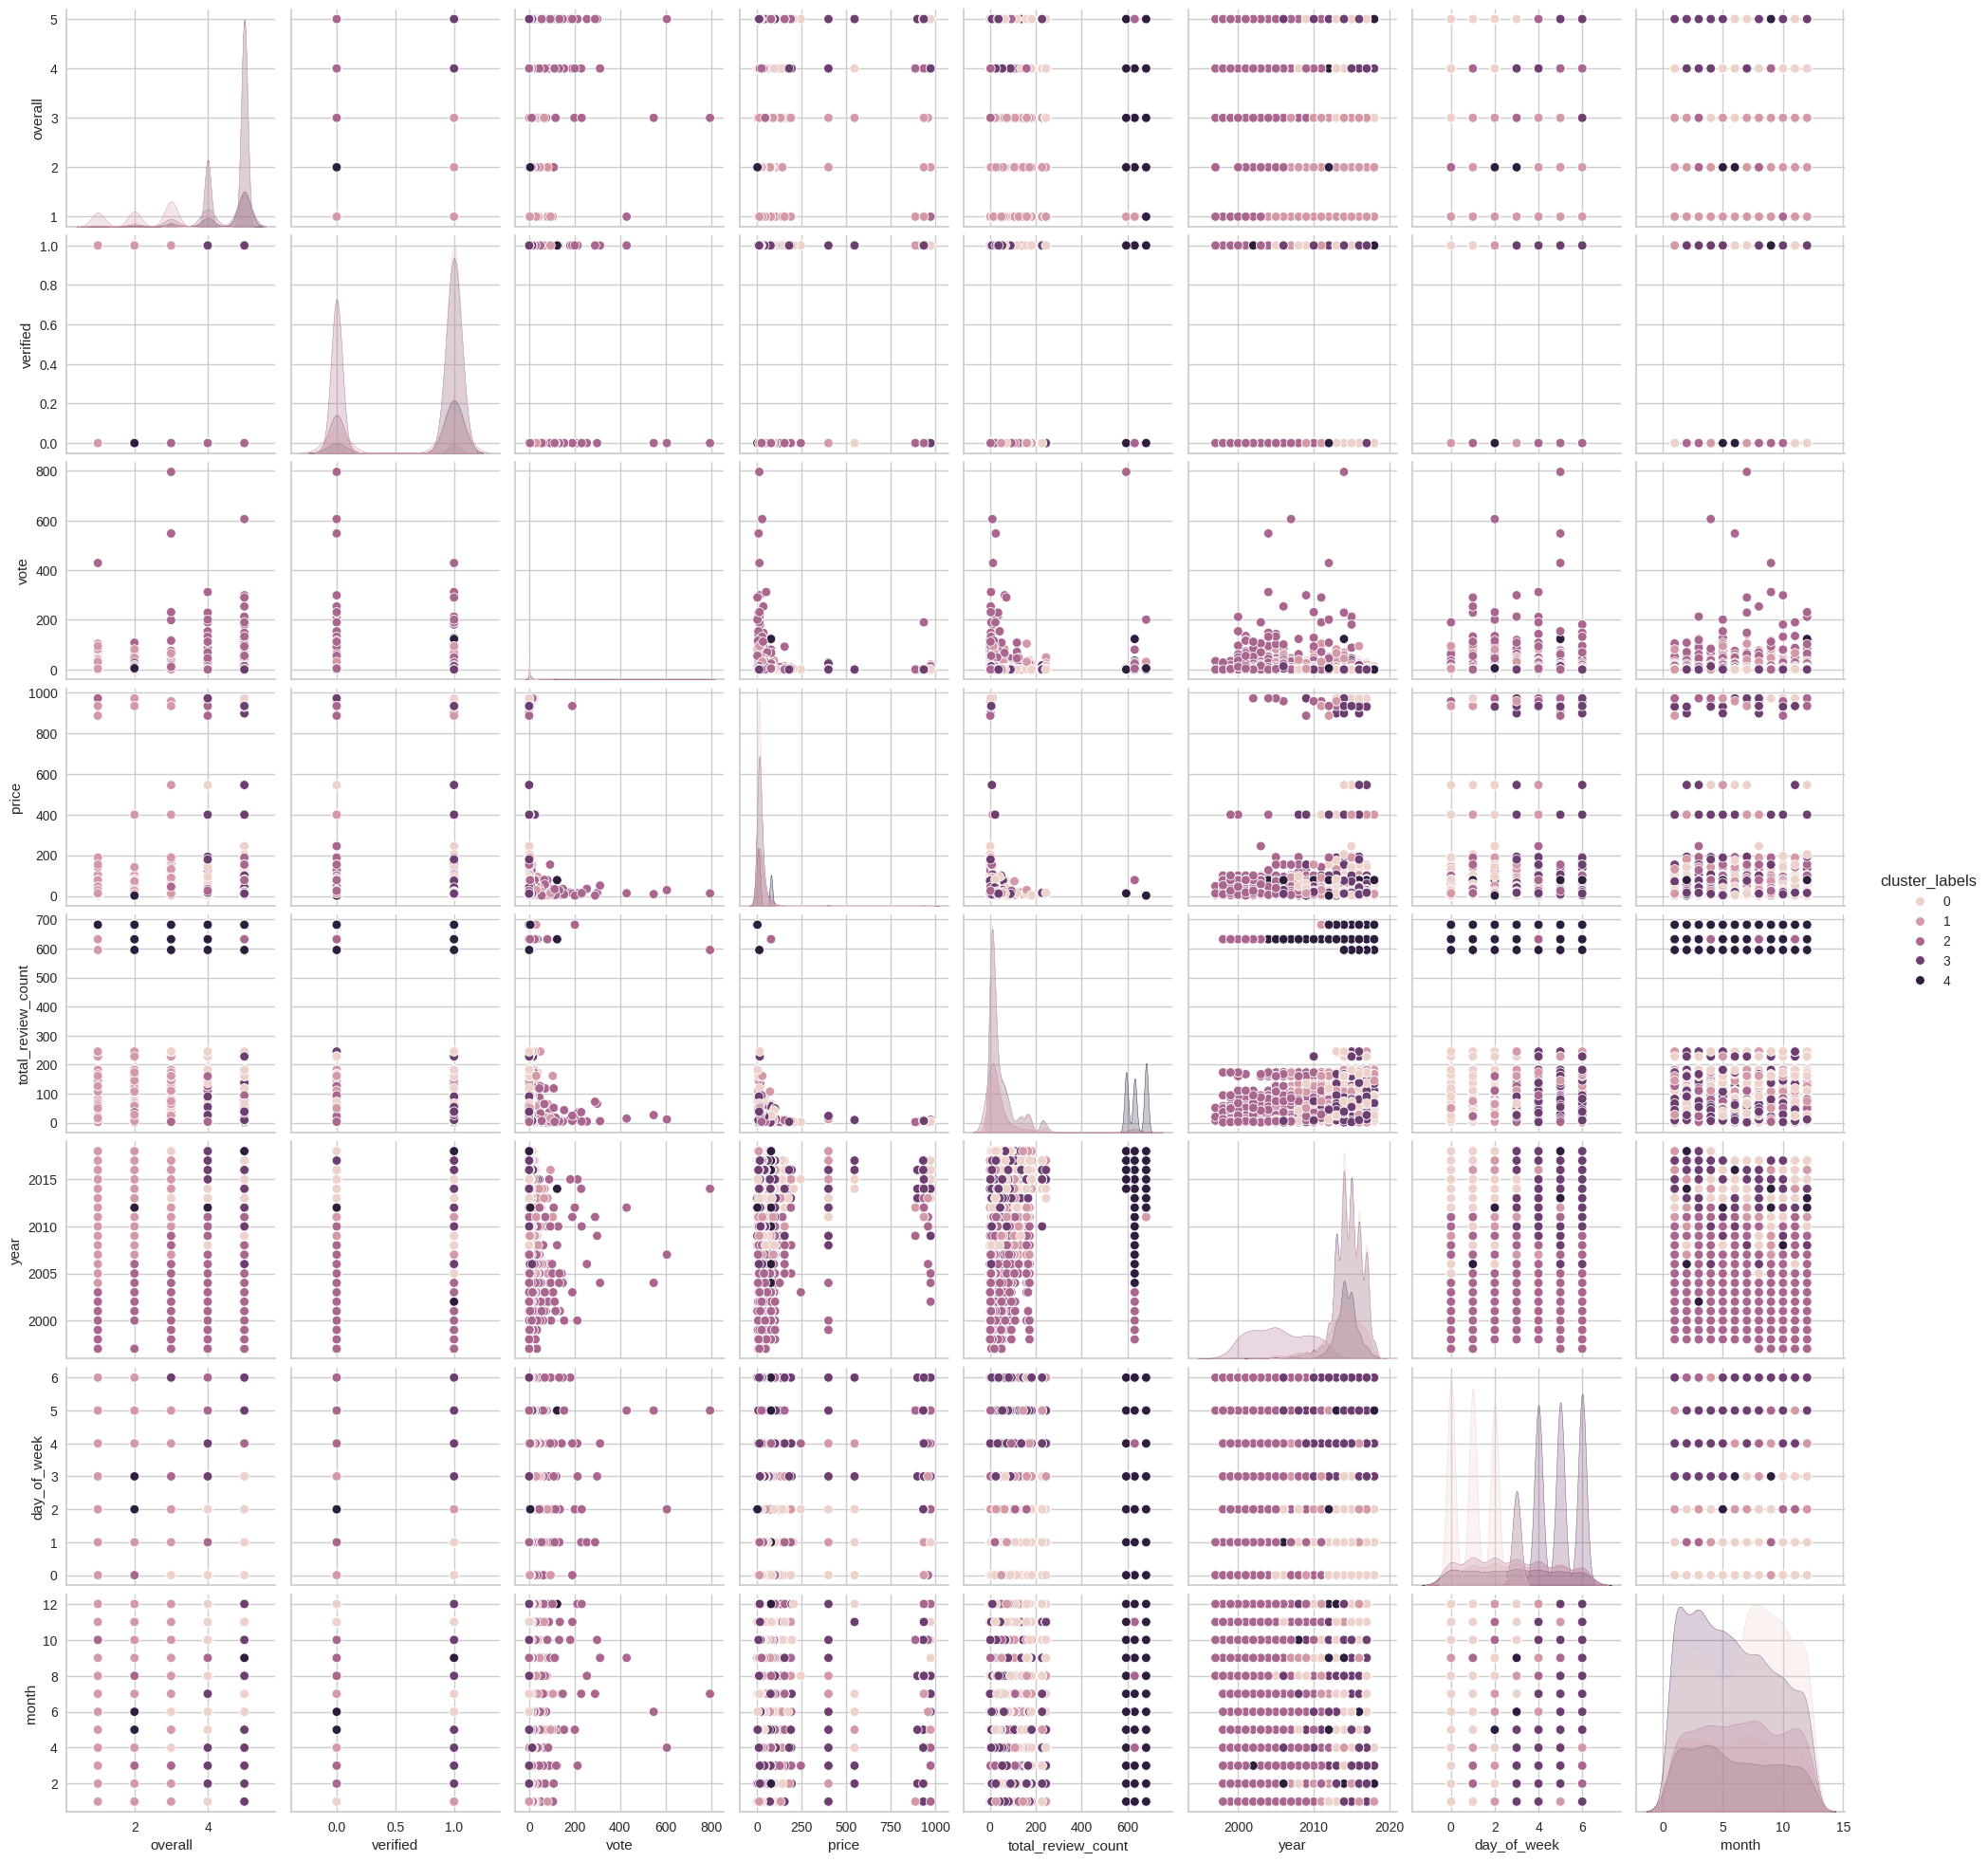

In [ ]:
# Plotting pair plots with KMeans clusters
sns.pairplot(kmeans_df, hue='cluster_labels')

### Hierarchical Clustering

---

Next, we tried Hierarchical clustering on our dataset. We utilized Silhouette scores to assess our clusters. We tried different methods and decided to move forward with `Ward` as it gave us the best results.

In [ ]:
# Hierarchical Clustering
from scipy.cluster.hierarchy import linkage, fcluster

Z = linkage(df_normalized, 'ward')
num_clusters = 5
clustering_df.drop('cluster_labels', axis=1)
clustering_df['cluster_labels'] = fcluster(Z, num_clusters, criterion='maxclust')

<ipython-input-35-3c4dad0dc87f>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



From the silhouette scores, the optimal number of clusters for hierarchical clustering was 6 clusters.

However, given we had used 5 clusters for KMeans, and the difference in silhouette score was not substantial between 5 and 6 clusters, so we decided to stick to 5 clusters to stay consistent.

Therefore, both KMeans and hierarchical clustering ended up yielding the same 5 clusters, showing that neither method was superior over the other.

<Axes: xlabel='cluster_no', ylabel='s_scores'>

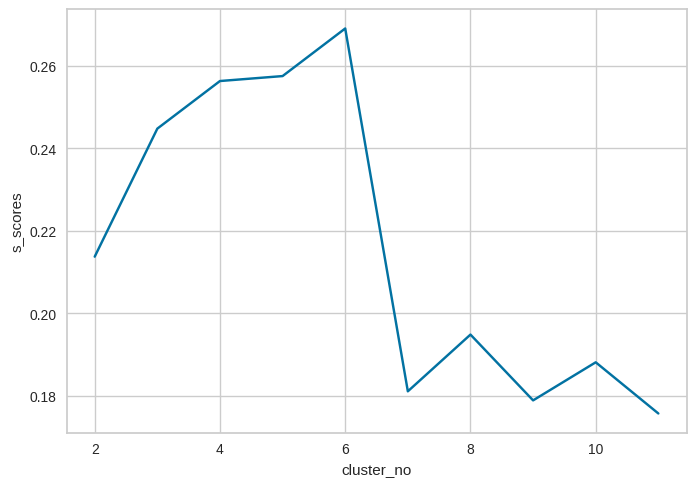

In [ ]:
# Plotting Silhouette Scores
from sklearn.metrics import silhouette_score

s_scores = []

for k in range(2, 12):
  clust_labels = fcluster(Z, k, criterion = 'maxclust')
  s_scores.append(silhouette_score(df_normalized, clust_labels))

s_scores_df = pd.DataFrame(data={'cluster_no': [2,3,4,5,6,7,8,9,10,11], 's_scores':s_scores})
sns.lineplot(s_scores_df, x="cluster_no", y="s_scores")

We take a look at the pairwise pairplots by cluster to find visualize any patterns. We observe some variation between clusters based on the `Price` and `Total_Review_Count` variables.

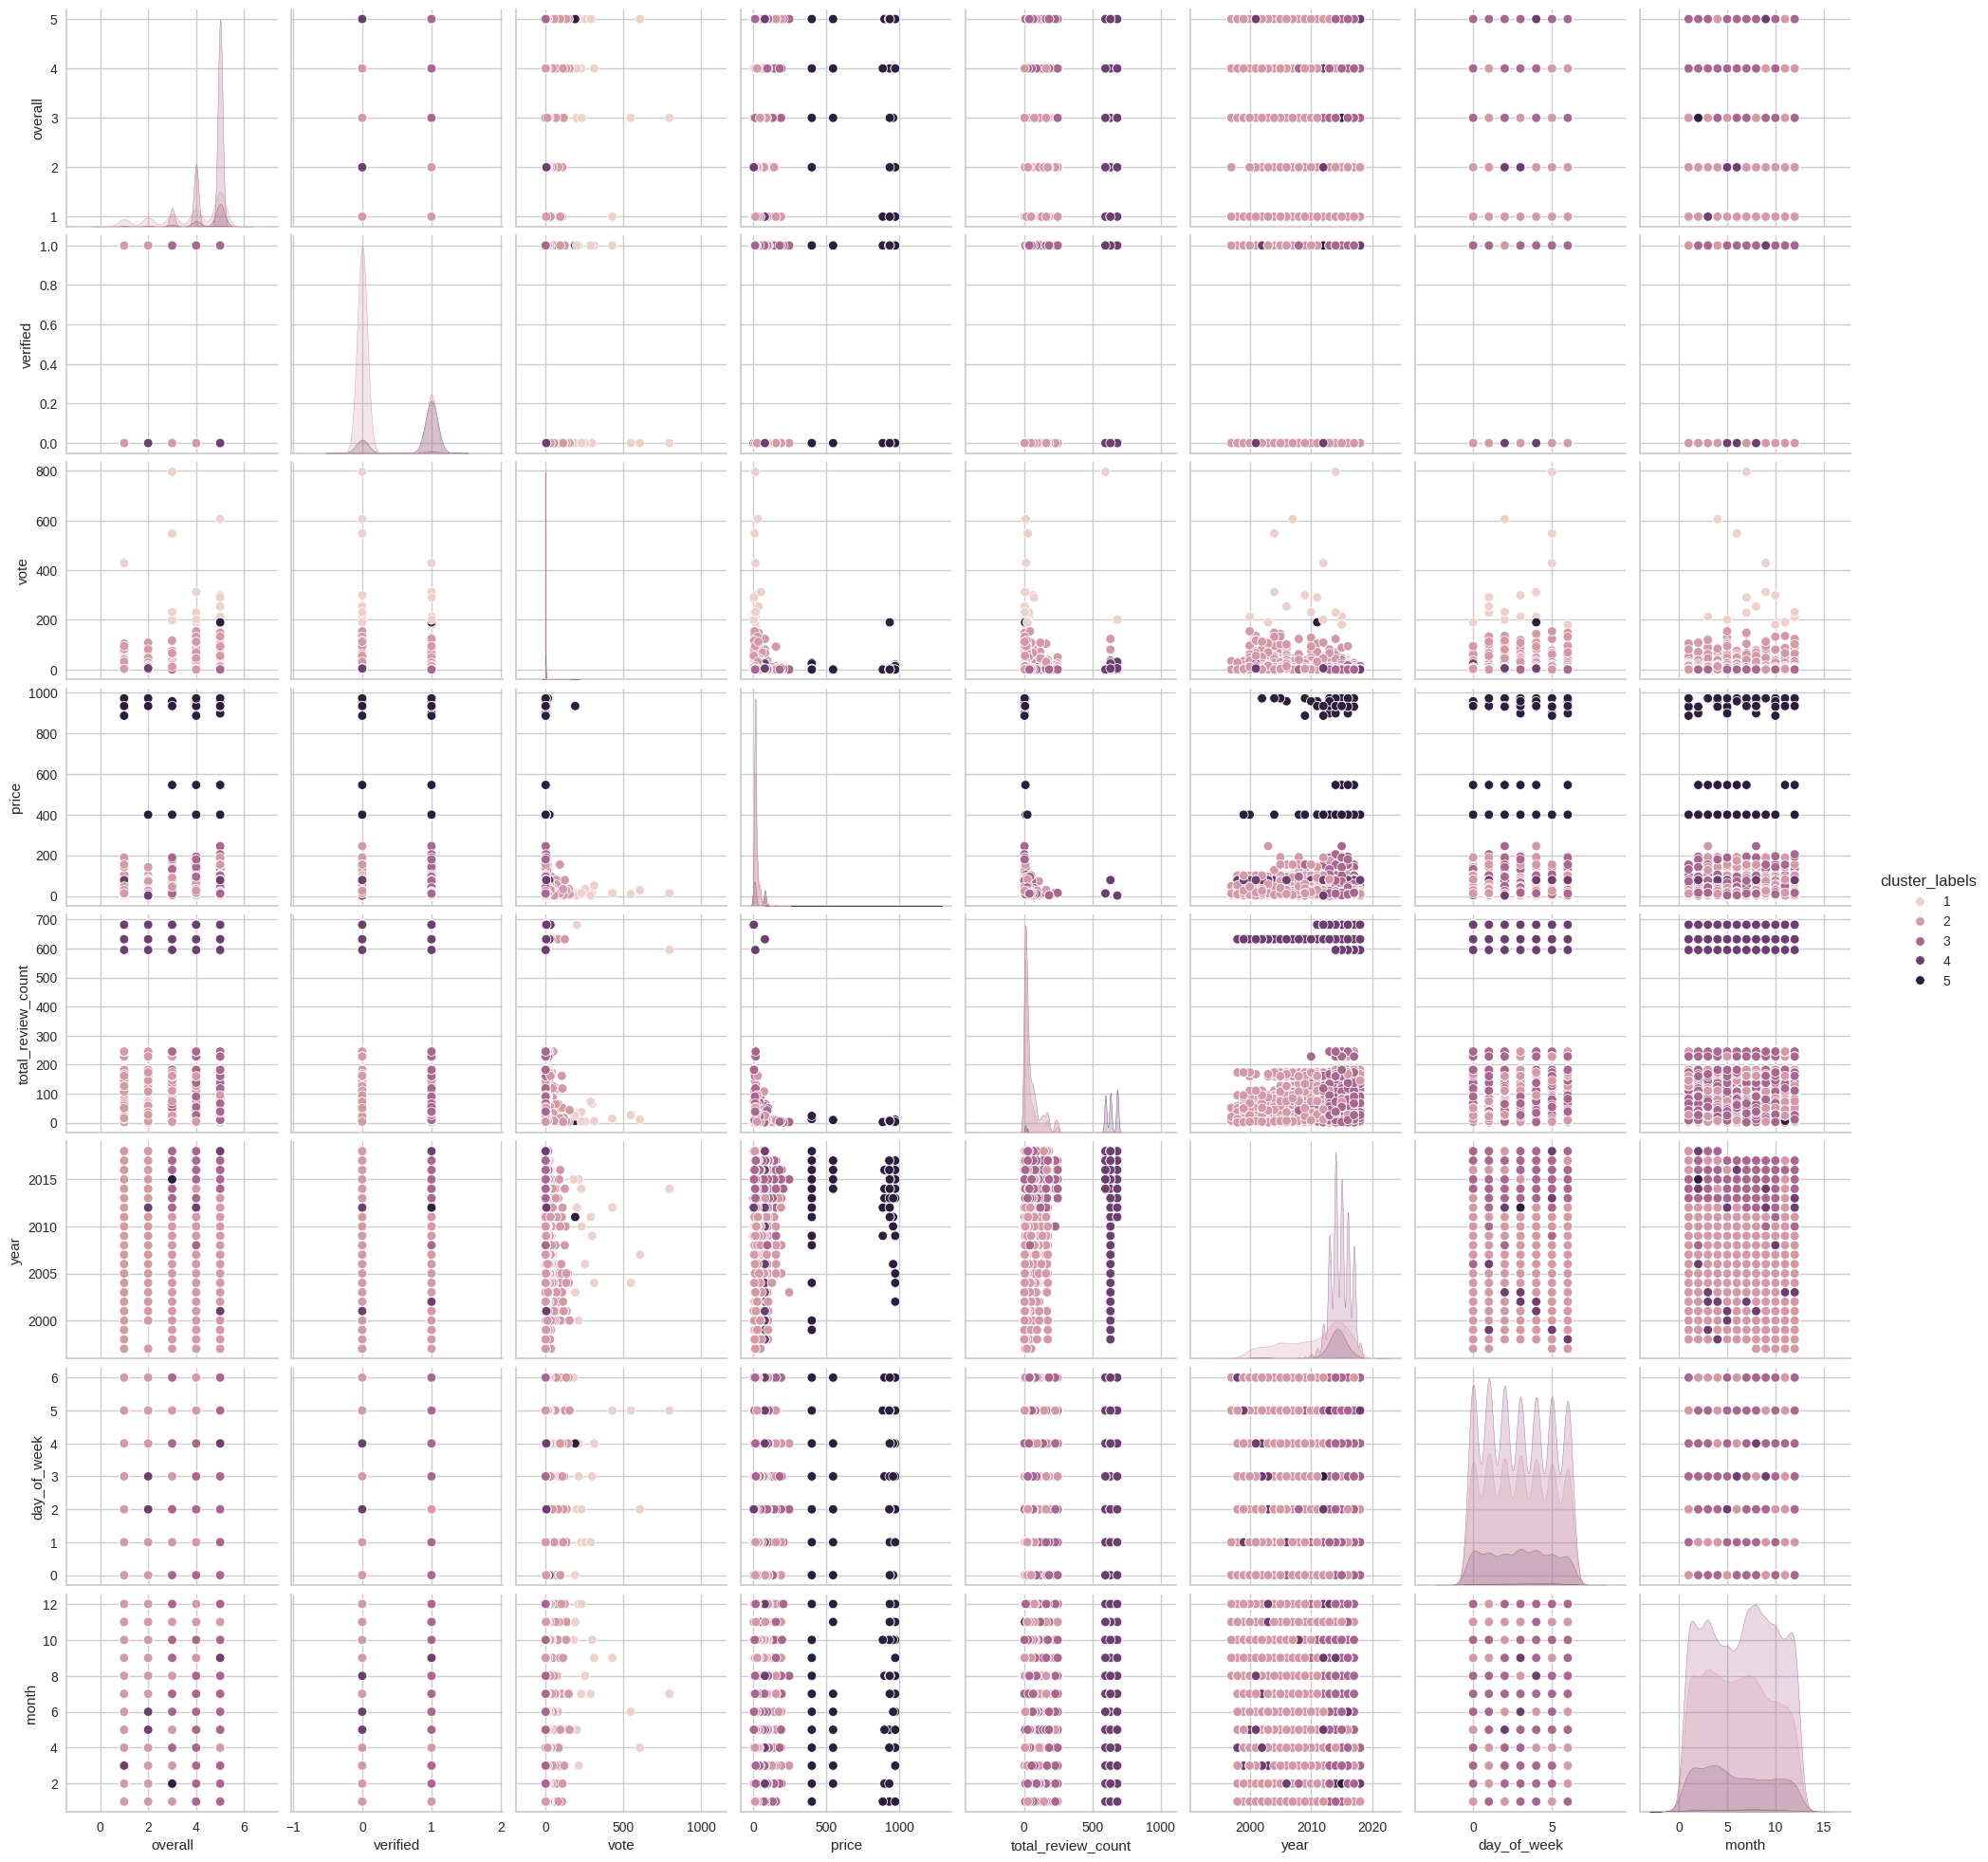

In [ ]:
# Plotting pair plots by cluster
sns.pairplot(clustering_df, hue='cluster_labels')

### Investigating Cluster Characteristics

---

We investigated cluster characteristics from both hierarchical and KMeans methods. From our preliminary analysis, we found that cluster characteristics across both methods were quite similar.

Our analysis also revealed different characteristics across the five clusters, offering insights into reader engagement, credibility of reviews, and book pricing.

Overall, the clusters show diverse behaviors, from high engagement and casual reviewing in Cluster 1 to the high credibility and positive reception in Clusters 3 and 4. Cluster 5 highlights a niche engaged segment of readers for expensive books. This analysis shows the different nature of book reviews.

In [ ]:
# Appending the cluster labels to our original dataframe

merged_df['hier_cluster_labels'] = clustering_df['cluster_labels']
merged_df['k_means_cluster_labels'] = kmeans_df['cluster_labels']

#### Hierarchical Clustering

---

In [ ]:
# Investigating the hierarchical clusters

# Cluster 1
merged_df[merged_df['hier_cluster_labels'] == 1].describe()

,overall,verified,vote,price,total_review_count,year,day_of_week,month,hier_cluster_labels,k_means_cluster_labels
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.0,16.0
mean,4.000000,0.437500,324.375000,14.950625,102.375000,2009.250000,2.87500,7.812500,1.0,1.0
std,1.154701,0.512348,179.263261,13.014339,210.816468,4.711688,1.78419,2.786126,0.0,0.0
min,1.000000,0.000000,181.000000,1.730000,4.000000,2000.000000,0.00000,3.000000,1.0,1.0
25%,3.000000,0.000000,209.250000,7.885000,11.750000,2005.500000,1.75000,5.750000,1.0,1.0
50%,4.000000,0.000000,242.500000,12.650000,25.000000,2010.500000,2.50000,7.500000,1.0,1.0
75%,5.000000,1.000000,341.250000,14.825000,43.250000,2012.500000,4.25000,10.000000,1.0,1.0
max,5.000000,1.000000,796.000000,50.920000,682.000000,2015.000000,6.00000,12.000000,1.0,1.0


Taking a look into Cluster 1, above the main insights:

* There are 16 entries in this cluster.
* The `vote` variable has a high mean value of approximately 324, which means that this cluster may represent reviews that received a lot of votes.
* The `overall` rating averages to 4, with a standard deviation of approximately 1.15, which suggests moderate variation in the ratings within this cluster.
* The `verified` mean is close to 0.43, suggesting that less than half of the reviews in this cluster come from verified purchases.
* The `price` has a wide range, with a mean of 14.95 and a standard deviation of 13.01, indicating varied pricing for the books in this cluster.
* The `total review count` is also a little bit spread out, with a mean of 102.38 and a high maximum value, suggesting some books have a very high review count.
* The `year` data suggests that the books in this cluster were reviewed around the year 2009 on average, with reviews spanning from the year 2000 to 2015.
* The `day of week` and `month` might represent the time when the reviews were most frequently posted, with averages suggesting that there isn't a strong bias toward any specific day of the week or month.

In [ ]:
# Cluster 2
merged_df[merged_df['hier_cluster_labels'] == 2].describe()

,overall,verified,vote,price,total_review_count,year,day_of_week,month,hier_cluster_labels,k_means_cluster_labels
count,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.0,6296.0
mean,3.773348,0.221887,3.652319,19.364868,37.209180,2010.339740,2.948380,6.136277,2.0,2.0
std,1.352993,0.415548,10.708929,19.593452,53.349176,5.163418,1.983259,3.393567,0.0,0.0
min,1.000000,0.000000,0.000000,0.010000,1.000000,1997.000000,0.000000,1.000000,2.0,2.0
25%,3.000000,0.000000,0.000000,8.210000,5.000000,2006.000000,1.000000,3.000000,2.0,2.0
50%,4.000000,0.000000,0.000000,13.820000,15.000000,2012.000000,3.000000,6.000000,2.0,2.0
75%,5.000000,0.000000,3.000000,22.810000,45.000000,2015.000000,5.000000,9.000000,2.0,2.0
max,5.000000,1.000000,154.000000,245.030000,632.000000,2018.000000,6.000000,12.000000,2.0,2.0


Taking a look into Cluster 2, above the main insights:

* This cluster contains a large number of entries of 6,296 reviews.
* The average rating `overall` for this cluster is approximately 3.77, which suggests that the books in this cluster are rated as good but not exceptional.
* A low `verified` purchase mean (around 0.22) indicates that only about 22% of the reviews are from verified purchases, which could impact the reliability of the reviews.
* The mean number of votes `(vote)` is relatively low at 3.65, but with a maximum of 154, showing that some reviews do have a lot of attention.
* The average price of books `(price)` is about 19.36, with a broad range, indicating a diversity in the book prices within this cluster.
* There is a wide range in the total number of reviews `(total review count)`, with some books getting up to 632 reviews, suggesting varying degrees of discussion among the books.
* The reviews span from 1997 to 2018, with most reviews written around 2010 `(year)`, showing a broad temporal distribution.
* The distribution of reviews over the days of the week and months`(day of week and month)` is quite even, with no particular day or month standing out.

In [ ]:
# Cluster 3
merged_df[merged_df['hier_cluster_labels'] == 3].describe()

,overall,verified,vote,price,total_review_count,year,day_of_week,month,hier_cluster_labels,k_means_cluster_labels
count,9235.000000,9235.0,9235.000000,9235.000000,9235.000000,9235.000000,9235.000000,9235.000000,9235.0,9235.0
mean,4.650785,1.0,0.313806,18.816258,48.589605,2014.726692,2.928749,6.497888,3.0,3.0
std,0.602750,0.0,1.581741,19.062630,59.349076,1.610831,2.002844,3.500808,0.0,0.0
min,2.000000,1.0,0.000000,0.010000,1.000000,2004.000000,0.000000,1.000000,3.0,3.0
25%,4.000000,1.0,0.000000,8.375000,8.000000,2014.000000,1.000000,3.000000,3.0,3.0
50%,5.000000,1.0,0.000000,13.780000,23.000000,2015.000000,3.000000,7.000000,3.0,3.0
75%,5.000000,1.0,0.000000,20.930000,66.000000,2016.000000,5.000000,9.000000,3.0,3.0
max,5.000000,1.0,30.000000,245.030000,245.000000,2018.000000,6.000000,12.000000,3.0,3.0


Taking a look into Cluster 3, above the main insights:

* Cluster '3' is also large, with 9,235 reviews.
* The books in this cluster have a high average rating of 4.65 (`overall`), indicating that they are generally well-regarded.
* Every review in this cluster is from a `verified` purchase (verified mean is 1.0), suggesting a higher reliability of the reviews.
* The average number of votes (`vote`) is quite low at 0.31, which could mean these books are less interesting or do not have as much active engagement in voting as the other clusters.
* The books are moderately `priced` on average (price mean of 18.81), with some books priced as high as 245.
* A relatively high average total review count (`total review count` mean of 48.58) suggests these books are frequently discussed, with a range that indicates some titles are more popular than others.
* The review years (`year`) range from 2004 to 2018, with an average around 2014, suggesting these books maintain ongoing interest.
* As with cluster '2', the review timing is spread evenly across days and `months`, with no specific trends in the timing of reviews (`day of week` and month averages are 2.92 and 6.49 respectively).

In [ ]:
# Cluster 4
merged_df[merged_df['hier_cluster_labels'] == 4].describe()

,overall,verified,vote,price,total_review_count,year,day_of_week,month,hier_cluster_labels,k_means_cluster_labels
count,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.0,1905.0
mean,4.573228,0.796850,0.325459,30.235575,638.337008,2013.580577,2.918635,5.985827,4.0,4.0
std,0.840804,0.402449,2.027673,33.825788,35.792246,3.276146,1.988463,3.560449,0.0,0.0
min,1.000000,0.000000,0.000000,1.730000,595.000000,1998.000000,0.000000,1.000000,4.0,4.0
25%,4.000000,1.000000,0.000000,1.730000,595.000000,2013.000000,1.000000,3.000000,4.0,4.0
50%,5.000000,1.000000,0.000000,12.310000,632.000000,2014.000000,3.000000,6.000000,4.0,4.0
75%,5.000000,1.000000,0.000000,77.950000,682.000000,2015.000000,5.000000,9.000000,4.0,4.0
max,5.000000,1.000000,36.000000,77.950000,682.000000,2018.000000,6.000000,12.000000,4.0,4.0


Taking a look into Cluster 4, above the main insights:

* Cluster 4 contains 1,905 reviews.
* The average rating (`overall`) is quite high at approximately 4.57, indicating that the books in this cluster are generally well-received.
* Most of reviews are from `verified` purchases, with a mean of 0.79685, suggesting high credibility.
* The mean number of votes (`vote`) is a little bit low at around 0.32, suggesting that these books don't tend to generate a lot of voting activity.
* The average price (`price`) is moderate at about 30.23, but there is considerable variability as indicated by the standard deviation of approximately 33.82.
* The total `review` count has a high mean of 638.33, suggesting that the books in this cluster attract a lot of reviews compared to others.
* The reviews cover a wide range of `years`, from 1998 to 2018, with most of them being around 2013, indicating sustained interest over a long period.
* Reviews are evenly distributed throughout the `week` and `year`, with no significant bias towards any particular day or month as the other clusters.

In [ ]:
# Cluster 5
merged_df[merged_df['hier_cluster_labels'] == 5].describe()

,overall,verified,vote,price,total_review_count,year,day_of_week,month,hier_cluster_labels,k_means_cluster_labels
count,89.000000,89.000000,89.000000,89.00000,89.000000,89.000000,89.000000,89.000000,89.0,89.0
mean,4.393258,0.752809,4.202247,690.15618,11.539326,2013.191011,3.078652,6.359551,5.0,5.0
std,1.103898,0.433823,20.578110,262.93590,7.370174,4.086776,1.984169,3.327732,0.0,0.0
min,1.000000,0.000000,0.000000,399.80000,2.000000,1999.000000,0.000000,1.000000,5.0,5.0
25%,4.000000,1.000000,0.000000,399.80000,7.000000,2012.000000,1.000000,4.000000,5.0,5.0
50%,5.000000,1.000000,0.000000,886.93000,10.000000,2015.000000,3.000000,7.000000,5.0,5.0
75%,5.000000,1.000000,2.000000,934.62000,23.000000,2016.000000,5.000000,9.000000,5.0,5.0
max,5.000000,1.000000,190.000000,972.49000,23.000000,2018.000000,6.000000,12.000000,5.0,5.0


Taking a look into Cluster 5, above the main insights:

* Cluster 5 comprises 89 reviews.
* The books in this cluster have an average rating (`overall`) of around 4.39, which is quite favorable.
* Nearly all the reviews come from `verified` purchases, as the verified mean is 0.752809, enhancing the trustworthiness of the ratings.
* The average number of votes (`vote`) is around 4.20, which is higher than in cluster '4', indicating more engagement in terms of voting.
* The standout feature of this cluster is the high average price (`price`) of approximately 690.15, suggesting that this cluster includes some of the most expensive books in the database.
* The `total review count` for this cluster is moderate, with an average of about 11.54, though there is significant variation as indicated by the standard deviation.
* The `year` range for reviews is from 1999 to 2018, with the average review year being around 2013, showing that these high-priced books have been consistently reviewed over the years.
* The distribution of reviews across days and months is relatively even, with a slight tendency towards reviews being written later in the year (average month is around 6.35).

#### KMeans Clustering

---

Below are the descriptive statistics from the KMeans clusters. However, we notice that cluster characteristics are similar to our results from hierarchical clustering above.

In [ ]:
# Moving on to KMeans

# Cluster 1
merged_df[merged_df['k_means_cluster_labels'] == 1].describe()

,overall,verified,vote,price,total_review_count,year,day_of_week,month,hier_cluster_labels,k_means_cluster_labels
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.0,16.0
mean,4.000000,0.437500,324.375000,14.950625,102.375000,2009.250000,2.87500,7.812500,1.0,1.0
std,1.154701,0.512348,179.263261,13.014339,210.816468,4.711688,1.78419,2.786126,0.0,0.0
min,1.000000,0.000000,181.000000,1.730000,4.000000,2000.000000,0.00000,3.000000,1.0,1.0
25%,3.000000,0.000000,209.250000,7.885000,11.750000,2005.500000,1.75000,5.750000,1.0,1.0
50%,4.000000,0.000000,242.500000,12.650000,25.000000,2010.500000,2.50000,7.500000,1.0,1.0
75%,5.000000,1.000000,341.250000,14.825000,43.250000,2012.500000,4.25000,10.000000,1.0,1.0
max,5.000000,1.000000,796.000000,50.920000,682.000000,2015.000000,6.00000,12.000000,1.0,1.0


In [ ]:
# Cluster 2
merged_df[merged_df['k_means_cluster_labels'] == 2].describe()

,overall,verified,vote,price,total_review_count,year,day_of_week,month,hier_cluster_labels,k_means_cluster_labels
count,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.0,6296.0
mean,3.773348,0.221887,3.652319,19.364868,37.209180,2010.339740,2.948380,6.136277,2.0,2.0
std,1.352993,0.415548,10.708929,19.593452,53.349176,5.163418,1.983259,3.393567,0.0,0.0
min,1.000000,0.000000,0.000000,0.010000,1.000000,1997.000000,0.000000,1.000000,2.0,2.0
25%,3.000000,0.000000,0.000000,8.210000,5.000000,2006.000000,1.000000,3.000000,2.0,2.0
50%,4.000000,0.000000,0.000000,13.820000,15.000000,2012.000000,3.000000,6.000000,2.0,2.0
75%,5.000000,0.000000,3.000000,22.810000,45.000000,2015.000000,5.000000,9.000000,2.0,2.0
max,5.000000,1.000000,154.000000,245.030000,632.000000,2018.000000,6.000000,12.000000,2.0,2.0


In [ ]:
# Cluster 3
merged_df[merged_df['k_means_cluster_labels'] == 3].describe()

,overall,verified,vote,price,total_review_count,year,day_of_week,month,hier_cluster_labels,k_means_cluster_labels
count,9235.000000,9235.0,9235.000000,9235.000000,9235.000000,9235.000000,9235.000000,9235.000000,9235.0,9235.0
mean,4.650785,1.0,0.313806,18.816258,48.589605,2014.726692,2.928749,6.497888,3.0,3.0
std,0.602750,0.0,1.581741,19.062630,59.349076,1.610831,2.002844,3.500808,0.0,0.0
min,2.000000,1.0,0.000000,0.010000,1.000000,2004.000000,0.000000,1.000000,3.0,3.0
25%,4.000000,1.0,0.000000,8.375000,8.000000,2014.000000,1.000000,3.000000,3.0,3.0
50%,5.000000,1.0,0.000000,13.780000,23.000000,2015.000000,3.000000,7.000000,3.0,3.0
75%,5.000000,1.0,0.000000,20.930000,66.000000,2016.000000,5.000000,9.000000,3.0,3.0
max,5.000000,1.0,30.000000,245.030000,245.000000,2018.000000,6.000000,12.000000,3.0,3.0


In [ ]:
# Cluster 4
merged_df[merged_df['k_means_cluster_labels'] == 4].describe()

,overall,verified,vote,price,total_review_count,year,day_of_week,month,hier_cluster_labels,k_means_cluster_labels
count,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.0,1905.0
mean,4.573228,0.796850,0.325459,30.235575,638.337008,2013.580577,2.918635,5.985827,4.0,4.0
std,0.840804,0.402449,2.027673,33.825788,35.792246,3.276146,1.988463,3.560449,0.0,0.0
min,1.000000,0.000000,0.000000,1.730000,595.000000,1998.000000,0.000000,1.000000,4.0,4.0
25%,4.000000,1.000000,0.000000,1.730000,595.000000,2013.000000,1.000000,3.000000,4.0,4.0
50%,5.000000,1.000000,0.000000,12.310000,632.000000,2014.000000,3.000000,6.000000,4.0,4.0
75%,5.000000,1.000000,0.000000,77.950000,682.000000,2015.000000,5.000000,9.000000,4.0,4.0
max,5.000000,1.000000,36.000000,77.950000,682.000000,2018.000000,6.000000,12.000000,4.0,4.0


## Next Steps

---

After clustering, we are curious to implement text mining and sentiment analysis to better understand the nature of positive and negative reviews for each book, giving us some summary statistics on sentiment for each book.

It also can give a quick overview of the review, like a form of summarization, to give other users a snapshot of what sentiment a review may have without having to read the whole review. This will help streamline user experience and improve quality of time spent on site.

## Text Mining

### Regex, Lemmatizing and Tokenizing


In [ ]:
reviews_df = merged_df[['reviewText']] # Creating a new df which only includes the reviewText

In [ ]:
reviews_df

,reviewText
0,This is the best Survival guide out there and ...
1,This was a fantastic book. Showing the normal...
2,I have loved this book from the first time I r...
3,I love this fun book. Janet Evanovich's books...
4,"Reading through, it almost feels like what one..."
...,...
17536,Excellent read. I couldn't put it down.
17537,Growing older and wiser with J P? Love all J @...
17538,"Jackie Burke is caught with $50,000.00 and som..."
17539,I was stunned. I have never read a book where...


In [ ]:
reviews_df = pd.DataFrame(reviews_df.reviewText.str.lower()) # Lower Case
reviews_df = pd.DataFrame(reviews_df['reviewText'].str.findall(r'\b[a-zA-Z\d]+\b')) # Keeping only english words (numbers included)
reviews_df['reviewText'] = reviews_df['reviewText'].apply(lambda x: ' '.join(x))

In [ ]:
reviews_df

,reviewText
0,this is the best survival guide out there and ...
1,this was a fantastic book showing the normal s...
2,i have loved this book from the first time i r...
3,i love this fun book janet evanovich s books a...
4,reading through it almost feels like what one ...
...,...
17536,excellent read i couldn t put it down
17537,growing older and wiser with j p love all j ja...
17538,jackie burke is caught with and some cocaine t...
17539,i was stunned i have never read a book where t...


In [ ]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def process_text(document):
    # Tokenizing the document
    tokens = word_tokenize(document)
    # Removing stop words
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Applying lemmatization first
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    return lemmatized_tokens

In [ ]:
# # Replacing positive words with a replacement word for better results in sentiment analysis later on
# positive_words = ['like', 'love', 'adore', 'enjoy', 'happy', 'excited',
#                   'amazing', 'awesome', 'fantastic', 'great', 'wonderful',
#                   'delightful', 'pleasure', 'blissful', 'cheerful', 'ecstatic',
#                   'excellent', 'fabulous', 'glorious', 'joyful', 'magnificent',
#                   'vibrant', 'delicious', 'grateful', 'satisfying', 'thrilled',
#                   'fortunate', 'beautiful', 'charming', 'brilliant', 'radiant',
#                   'energetic', 'lively', 'euphoric', 'celebratory', 'uplifting',
#                   'inspiring', 'fulfilled', 'content', 'triumphant', 'graceful',
#                   'tranquil', 'serene', 'optimistic', 'blessed', 'jubilant',
#                   'exhilarated', 'sunny', 'affectionate', 'victorious', 'glowing',
#                   'wholesome', 'heartwarming', 'sensational', 'gleeful', 'zestful', 'best']

# replacement_word = 'positive'  # The word to replace positive words with

# # Create a regular expression pattern to match any positive word
# pattern = '|'.join(r'\b{}\b'.format(word) for word in positive_words)

# # Replace positive words with the replacement word
# reviews_df['reviewText'] = reviews_df['reviewText'].str.replace(pattern, replacement_word)

<ipython-input-116-2d8dfe8a369f>:20: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews_df['reviewText'] = reviews_df['reviewText'].str.replace(pattern, replacement_word)


In [ ]:
# # Replacing negative words with a replacement word for better results in sentiment analysis later on
# negative_words = ['dislike', 'hate', 'despise', 'disgust', 'sad', 'depressed',
#                   'frustrated', 'angry', 'annoyed', 'irritated', 'worried',
#                   'miserable', 'unhappy', 'upset', 'regret', 'disappoint',
#                   'terrible', 'awful', 'horrible', 'bad', 'poor',
#                   'dreadful', 'painful', 'unpleasant', 'distressed', 'anguished',
#                   'stressed', 'gloomy', 'mournful', 'heartbroken', 'sorrowful',
#                   'desperate', 'grief-stricken', 'hopeless', 'despairing', 'bleak',
#                   'lonely', 'isolated', 'desolate', 'unfortunate', 'tragic',
#                   'dismal', 'grim', 'melancholy', 'wretched', 'disheartened',
#                   'discouraged', 'demoralized', 'futile', 'forlorn', 'defeated']

# replacement_word = 'negative'  # The word to replace negative words with

# # Create a regular expression pattern to match any negative word
# pattern = '|'.join(r'\b{}\b'.format(word) for word in negative_words)

# # Replace negative words with the replacement word
# reviews_df['reviewText'] = reviews_df['reviewText'].str.replace(pattern, replacement_word)


<ipython-input-117-21d4c038f3e5>:19: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews_df['reviewText'] = reviews_df['reviewText'].str.replace(pattern, replacement_word)


In [ ]:
# print(' '.join(process_text(reviews_df['reviewText'].loc[0])))

positive survival guide pocket sized take anywhere reasonably priced buy several put one desk pack one camping gear put one bob inclined easy read easy follow easy perform


### Tokenization

In [ ]:
# Tokenizing reviews

tokenized_reviews = [process_text(review) for review in reviews_df['reviewText']]

In [ ]:
tokenized_reviews

In [ ]:
reviews_df["tokenized"] = tokenized_reviews

In [ ]:
# Vectorizing model
# Try different hyperparameters?

from gensim.models import Word2Vec

model_word2vec = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=2) # negative=50 , epochs=50, vector_size=300

model_word2vec = model_word2vec.wv

### Unsupervised Approach

In [ ]:
# Defining the two extremes, ideal_pos and ideal_neg.

#maybe try more lists - look into online resources
ideal_pos = ["positive", "fantastic", "love", "amazing", "nice", "gorgeous", "like", "good", "favorite", "best", 'great', 'wonder', 'delight', 'pleasure', 'grateful', 'satisfying', 'thrilled', 'fortunate', 'beautiful', 'charming', 'brilliant', 'radiant', 'inspiring', 'fulfilled', 'content', 'triumphant', 'graceful',  'wholesome', 'heartwarming', 'sensational', 'gleeful', 'zestful', "enjoyable", "abundance", "amaze", "enjoy", "great", "excellent", "stun", "yes", "recommend","beautiful", "adore", "appreciate", "cherish", "happy", "nice", "interesting", "captivating", "want", "refreshing", "fun", "brilliant", "satisfying", "warm", "sun", "fan"]
ideal_neg = ["negative", "boring", "terrible", "bad", "hate", "disappointed", "sucks", 'dislike', 'despise', 'disgust', 'sad', 'depressed', 'frustrated', 'angry', 'annoyed', 'irritate', 'worry', 'miserable', 'unhappy', 'upset', 'regret', 'disappoint', 'terrible', 'awful', 'horrible', 'bad', 'poor', 'dreadful', 'painful', 'unpleasant', 'distressed', 'anguished', 'stressed', 'gloomy', 'mournful', 'heartbroken', 'sorrowful', 'desperate', 'grief-stricken', 'hopeless', "no", 'despairing', 'bleak', 'lonely', 'isolated', 'desolate', 'unfortunate', 'tragic', 'dismal', 'grim', 'melancholy', 'wretched', 'disheartened', 'discouraged', 'demoralized', 'futile', 'forlorn', 'defeated']

In [ ]:
# Defining the sentiment score function

def sentiment(review):
  return model_word2vec.n_similarity(review, ideal_pos) - model_word2vec.n_similarity(review, ideal_neg)

In [ ]:
# Pulling out some test sentences/reviews just to test the model

test_sentence_pos = word_tokenize("great book loved it")
test_sentence_neg = word_tokenize("bad book hated it")

In [ ]:
#Testing with test positive and ideal negative - should be low

model_word2vec.n_similarity(test_sentence_pos, ideal_neg)

0.75483316

In [ ]:
#Testing with test negative and ideal positive - should be low

model_word2vec.n_similarity(test_sentence_neg, ideal_pos)

0.83704656

In [ ]:
#Testing the model with both positive - should be high

model_word2vec.n_similarity(test_sentence_pos, ideal_pos)

0.9150084

In [ ]:
#Testing the model with both negative - should be high

model_word2vec.n_similarity(test_sentence_neg, ideal_neg)

0.87077385

In [ ]:
#Some of the tokenized reviews are empty lists, which may be because the review was all stop words, which will break our sentiment function.
#We have to remove them but also keep track of what we are removing so we can reattach the correct sentiment scores back to the old merged_df dataframe

#Doing so by keeping track of what indices of the empty lists are

removed_indices = []

for index, x in tokenized_reviews.items():
  if not x:
    removed_indices.append(index)

removed_indices

[442,
 743,
 1061,
 1415,
 2331,
 3384,
 4495,
 4999,
 5759,
 7363,
 7647,
 9126,
 9438,
 9878,
 12214,
 13237,
 14949]

In [ ]:
#Now actually removing those indices

tokenized_reviews = [x for x in tokenized_reviews if x != []]

In [ ]:
#Changing the list of lists to a series so we can use the apply function later

tokenized_reviews_series = pd.Series(list(tokenized_reviews))

In [ ]:
#Extracting sentiment scores with previously defined sentiment function

sentiment_score = tokenized_reviews_series.apply(lambda x: sentiment(x))

In [ ]:
#storing it in a df

sentiment_score_df = pd.DataFrame(sentiment_score, columns=['sentiment score'])

<Axes: >

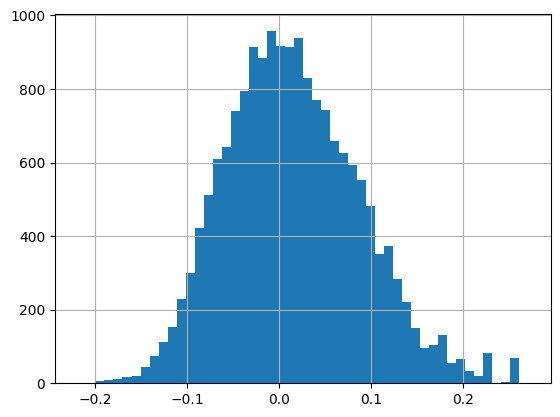

In [266]:
#Histogram

sentiment_score.hist(bins=50)

In [ ]:
#Dropping the rows of the empty lists and resetting the index

merged_df_removed = merged_df.drop(index=removed_indices).reset_index()

In [ ]:
#Reattaching the sentiment scores to the original df so we can do some more analysis based on the features

merged_df_removed['sentiment_score'] = sentiment_score
merged_df_removed

,index,overall,verified,reviewTime,asin,style,reviewText,summary,vote,title,price,total_review_count,year,day_of_week,month,sentiment_score
0,0,5,1,2017-08-07,0002171856,Paperback,This is the best Survival guide out there and ...,Best Survival Guide Ever!,0,The Sas Survival Handbook,9.45,40,2017,0,8,0.038804
1,1,5,1,2015-06-08,0007480849,Kindle Edition,This was a fantastic book. Showing the normal...,This was a fantastic book. Showing the normal ...,0,FORGOTTEN SEAMSTRESS- PB,13.37,14,2015,0,6,0.000324
2,2,5,1,2016-02-03,0007449313,unknown,I have loved this book from the first time I r...,I have loved this book from the first time I r...,0,Pride &amp; Prejudice (Collins Classics),24.99,80,2016,2,2,0.048175
3,3,5,0,2013-09-11,0007176236,Mass Market Paperback,I love this fun book. Janet Evanovich's books...,Huge fan!,0,METRO GIRL (Alex Barnaby),24.98,17,2013,2,9,0.014944
4,4,4,1,2017-04-07,0002255863,Paperback,"Reading through, it almost feels like what one...",it almost feels like what one would imagine th...,2,The God of Small Things,5.49,20,2017,4,4,-0.059666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17519,17536,4,1,2017-02-09,0007177437,Kindle Edition,Excellent read. I couldn't put it down.,Four Stars,0,PEOPLE OF THE BOOK,15.99,26,2017,3,2,0.148209
17520,17537,5,1,2014-08-29,0007531966,Kindle Edition,Growing older and wiser with J P? Love all J @...,Love all J @ Jances books,0,Second Watch,13.44,34,2014,4,8,0.021656
17521,17538,4,0,2002-09-21,0060082194,Mass Market Paperback,"Jackie Burke is caught with $50,000.00 and som...",RUM PUNCH HAS SOME PUNCH!!!,0,Rum Punch,25.13,3,2002,5,9,-0.109175
17522,17539,5,0,2001-08-10,000711835X,Imitation Leather,I was stunned. I have never read a book where...,"Amazing, shocking, a truly brilliant work of art!",4,The Hobbit,77.95,632,2001,4,8,-0.027991


In [ ]:
#

merged_df_removed.groupby('overall')['sentiment_score'].mean()

overall
1   -0.024278
2   -0.019384
3   -0.009299
4    0.003775
5    0.027870
Name: sentiment_score, dtype: float32

In [ ]:
merged_df_removed.groupby('verified')['sentiment_score'].mean()

verified
0   -0.018814
1    0.030210
Name: sentiment_score, dtype: float32

In [ ]:
merged_df_removed.groupby('style')['sentiment_score'].mean().sort_values(ascending=False)

style
Amazon Video                       0.058208
Kindle Edition with Audio/Video    0.051645
Vinyl Bound                        0.050937
Leather Bound                      0.047435
Board book                         0.031964
Kindle Edition                     0.026010
Imitation Leather                  0.022027
unknown                            0.020092
School & Library Binding           0.018709
Vinyl                              0.015548
DVD                                0.013140
Audio CD                           0.010915
Poster                             0.010092
Loose Leaf                         0.005913
Hardcover                          0.005765
Mass Market Paperback              0.004514
MP3 CD                             0.002526
Paperback                          0.000659
Audio Cassette                    -0.000026
Library Binding                   -0.001678
Hardcover-spiral                  -0.002274
MP3 Music                         -0.003439
Audible Audiobook         

In [ ]:
merged_df_removed.groupby('vote')['sentiment_score'].mean() #.sort_values(ascending=False)

vote
84     0.041325
0      0.025978
73     0.020589
80     0.016253
94     0.007346
         ...   
108   -0.120900
254   -0.124593
148   -0.124889
116   -0.134684
95    -0.141752
Name: sentiment_score, Length: 113, dtype: float32

### Archive/Old/Unused code

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# cv = CountVectorizer()

# cv.fit(reviews_df.reviewText)

# print('number of `tokens`', len(cv.vocabulary_))
# cv.vocabulary_

In [ ]:
# dtm = cv.transform(reviews_df.reviewText)
# bow = pd.DataFrame(dtm.toarray(), columns=cv.get_feature_names_out())
# bow

In [ ]:
# Pulling out the embeddings to use as features for logistic regression

import nltk
nltk.download('punkt')

# def get_word_embedding(word, model):
#     if word in model.key_to_index:
#         return model[word]
#     else:
#         return np.zeros(model.vector_size)


# embeddings = []
# for review in tokenized_reviews:
#   review_embeddings = [get_word_embedding(word, model_word2vec) for word in review ]
#   review_embedding = np.mean(review_embeddings if len(review_embeddings) >0 else [np.zeros(model_word2vec.vector_size)], axis=0)
#   embeddings = embeddings + [review_embedding]

# embeddings = np.array(embeddings)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# embeddings.shape

(17541, 100)

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# import sklearn
# from sklearn.metrics import confusion_matrix, classification_report, f1_score

# X_train, X_test, y_train, y_test = train_test_split(embeddings, reviews_df['reviewText'], test_size=0.2, random_state=42)

# # Train the model
# model_word2vec_classification = LogisticRegression()
# model_word2vec_classification.fit(X_train, y_train)

# # Predict on the test data
# y_pred2 = model_word2vec_classification.predict(X_test)

# # Evaluate the model using 'weighted' average for multiclass classification
# f1_score_weighted = f1_score(y_test, y_pred2, average='weighted')
# print(f"f1_score (weighted): {f1_score_weighted}")

# # Classification Report
# print(classification_report(y_test, y_pred2))
